In [1]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Data Cleanup
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return
    
df['job_skills'] = df['job_skills'].apply(clean_list)

In [12]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

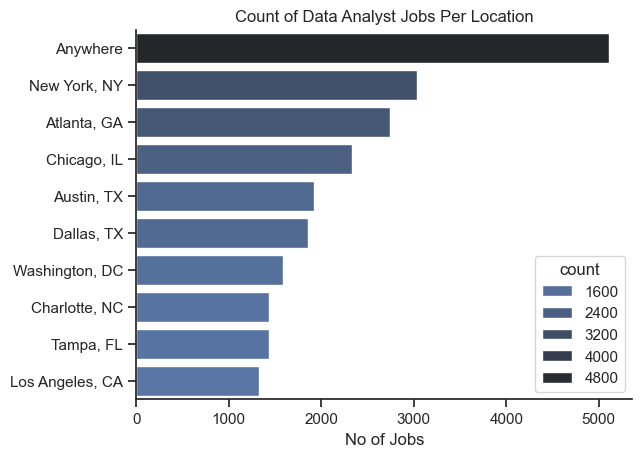

In [13]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette = 'dark:b_r')
sns.despine()
plt.title('Count of Data Analyst Jobs Per Location')
plt.xlabel('No of Jobs')
plt.ylabel('')
plt.show()

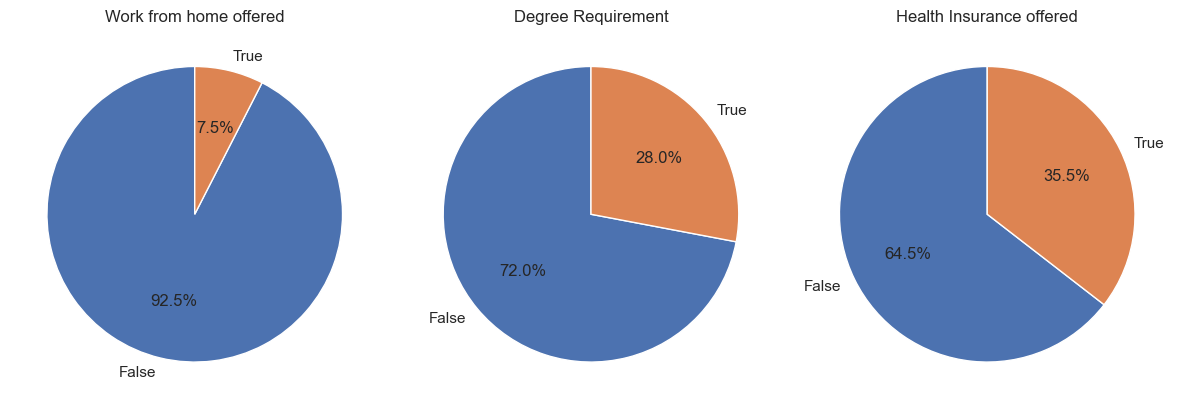

In [14]:
dict_column = {
    'job_work_from_home' : 'Work from home offered',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance offered'
} 
fig,ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),labels = ['False','True'],autopct= '%1.1f%%',startangle = 90)
    ax[i].set_title(title)
    
fig.tight_layout()

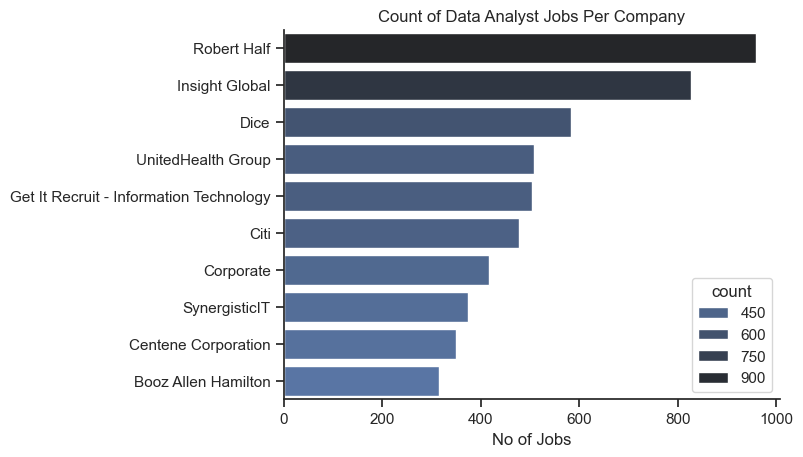

In [16]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette = 'dark:b_r')
sns.despine()
plt.title('Count of Data Analyst Jobs Per Company')
plt.xlabel('No of Jobs')
plt.ylabel('')
plt.show()